In [1]:
import sys
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python39/Lib/site-packages")
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python36/Lib/site-packages")

from PIL import Image
import numpy as np
import os
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
data_dir_bi = 'Task 1 Dataset/datasets/bi-class'
data_dir_multi = 'Task 1 Dataset/datasets/multi-class'

In [3]:
datas_bi = os.listdir(data_dir_bi )
print(datas_bi)

['breast-cancer.npz', 'diabetes.npz', 'digit.npz', 'iris.npz', 'wine.npz']


In [4]:
datas_multi = os.listdir(data_dir_multi)
print(datas_multi)

['test_images.mat', 'test_labels.mat', 'train_images.mat', 'train_labels.mat']


In [5]:
breast_cancer = np.load(os.path.join(data_dir_bi,datas_bi[0]))
breast_cancer['train_X'].shape

(547, 10)

In [6]:
train_breast_cancer = breast_cancer['train_X']
train_breast_cancer_labels = breast_cancer['train_Y']
test_breast_cancer = breast_cancer['test_X']
test_breast_cancer_labels = breast_cancer['test_Y']

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Breast  Cancer

In [42]:
history = model.fit(train_breast_cancer,train_breast_cancer_labels, validation_split=0.2,epochs=10)

Epoch 1/10
 1/14 [=>............................] - ETA: 2s - loss: 2.6261 - accuracy: 0.0000e+00

C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 0s 9ms/step - loss: 2.1593 - accuracy: 0.2769 - val_loss: 1.5331 - val_accuracy: 0.8455
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 1.2402 - accuracy: 0.8101 - val_loss: 0.7591 - val_accuracy: 0.9364
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.7306 - accuracy: 0.8810 - val_loss: 0.4274 - val_accuracy: 0.9545
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.9176 - val_loss: 0.2800 - val_accuracy: 0.9636
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.9291 - val_loss: 0.2022 - val_accuracy: 0.9636
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 0.2379 - accuracy: 0.9428 - val_loss: 0.1621 - val_accuracy: 0.9727
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.1839 - accuracy: 0.9611 - val_loss: 0.1445 - val_accuracy: 0.9727
Epoch 8/10
14/14 [=============

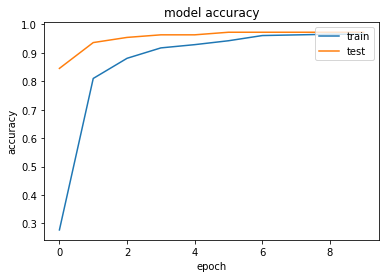

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

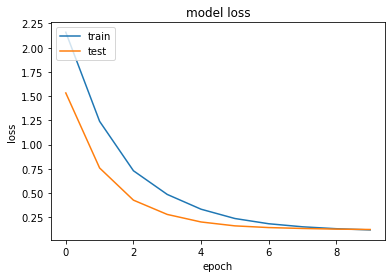

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [46]:
test_loss, test_acc = model.evaluate(test_breast_cancer, test_breast_cancer_labels)

5/5 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9706


### Reference

[1] https://www.tensorflow.org/tutorials/keras/classification
[2] https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/